In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [255]:
df = pd.read_excel("Sep-15-2018 to Jan-31-2019 Report.xlsx",sheet_name='MasterSheet')

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 32 columns):
Incident ID*+                               5964 non-null object
Reported Date+                              5964 non-null datetime64[ns]
Date                                        5964 non-null datetime64[ns]
Operational Categorization Tier 1           5963 non-null object
Operational Categorization Tier 2           5963 non-null object
Operational Categorization Tier 3           5696 non-null object
Estimated Resolution Date*                  23 non-null datetime64[ns]
Site Group(200000007)                       5964 non-null object
Summary*                                    5964 non-null object
Notes                                       5964 non-null object
Urgency*                                    5964 non-null object
Assigned Group*+                            5964 non-null object
Assignee+                                   5954 non-null object
First Name*+              

In [257]:
df.head()

,Incident ID*+,Reported Date+,Date,Operational Categorization Tier 1,Operational Categorization Tier 2,Operational Categorization Tier 3,Estimated Resolution Date*,Site Group(200000007),Summary*,Notes,...,Unnamed: 22,Last Resolved Date,Resolution,Resolution Method,Resolution Product Categorization Tier 1,Resolution Product Categorization Tier 2,Resolution Product Categorization Tier 3,Last Modified Date.1,Closed Date,ERP Service
0,INC000352568583,2019-01-31 10:11:12,2019-01-31,Old ERP,DBA,Report Requirement,NaT,Corporate,DBA-Report Requirement,REWIND THE WF,...,00:10:00,NaT,NaN,NaN,NaN,NaN,NaN,2019-01-31 10:21:12,NaT,NaN
1,INC000352565293,2019-01-30 21:29:42,2019-01-30,Oracle ERP,Property Manager,Lease,NaT,Maharashtra & Goa,Property Manager - Lease,rent escalation amount not calculated for leas...,...,12:49:46,NaT,NaN,NaN,NaN,NaN,NaN,2019-01-31 10:19:28,NaT,NaN
2,INC000352565246,2019-01-30 20:09:34,2019-01-30,Oracle ERP,SCM Inventory,Any Other Technical Issue,NaT,Maharashtra & Goa,SCM Inventory-Any Other Technical Issue,"Dear team, Please find the attachment and res...",...,00:38:29,2019-01-30 20:47:48,"As discussed on call, please cancel the curren...",Remote Control,NaN,NaN,NaN,2019-01-30 20:48:03,NaT,TYPE 1 SR
3,INC000352565243,2019-01-30 20:05:35,2019-01-30,Oracle ERP,Property Manager,Workflow issue,NaT,Tamilnadu,Property Manager - Workflow issue,"Team, Again 2nd time to raised Submitted but a...",...,13:41:32,NaT,NaN,NaN,NaN,NaN,NaN,2019-01-31 09:47:07,NaT,NaN
4,INC000352562323,2019-01-30 19:38:11,2019-01-30,Oracle ERP,Property Manager,AP invoices/Payment,NaT,Kerala,Property Manager - AP invoices/Payment,Invoice number PN-1640613 not getting export t...,...,13:46:53,NaT,NaN,NaN,NaN,NaN,NaN,2019-01-31 09:25:04,NaT,NaN


In [258]:
df.columns

Index(['Incident ID*+', 'Reported Date+', 'Date',
       'Operational Categorization Tier 1',
       'Operational Categorization Tier 2',
       'Operational Categorization Tier 3', 'Estimated Resolution Date*',
       'Site Group(200000007)', 'Summary*', 'Notes', 'Urgency*',
       'Assigned Group*+', 'Assignee+', 'First Name*+', 'Last Name*+',
       'Internet E-mail', 'Department', 'Status*', 'Status_Reason_Hidden',
       'Vendor Ticket Number', 'Site+', 'Last Modified Date', 'Unnamed: 22',
       'Last Resolved Date', 'Resolution', 'Resolution Method',
       'Resolution Product Categorization Tier 1',
       'Resolution Product Categorization Tier 2',
       'Resolution Product Categorization Tier 3', 'Last Modified Date.1',
       'Closed Date', 'ERP Service'],
      dtype='object')

In [266]:
df1= df[['Incident ID*+','Date']]
df1.head()

,Incident ID*+,Date
0,INC000352568583,2019-01-31
1,INC000352565293,2019-01-30
2,INC000352565246,2019-01-30
3,INC000352565243,2019-01-30
4,INC000352562323,2019-01-30


In [267]:
df1['Incident ID*+'].loc[:]=1
df1.head()

,Incident ID*+,Date
0,1,2019-01-31
1,1,2019-01-30
2,1,2019-01-30
3,1,2019-01-30
4,1,2019-01-30


In [268]:
df1['Date']= pd.to_datetime(df1['Date'])

In [269]:
df1.head()

,Incident ID*+,Date
0,1,2019-01-31
1,1,2019-01-30
2,1,2019-01-30
3,1,2019-01-30
4,1,2019-01-30


In [270]:
df1.head()

,Incident ID*+,Date
0,1,2019-01-31
1,1,2019-01-30
2,1,2019-01-30
3,1,2019-01-30
4,1,2019-01-30


In [271]:
df1 = df1.groupby('Date')['Incident ID*+'].sum().reset_index()
df1.head()

,Date,Incident ID*+
0,2018-09-15,32
1,2018-09-16,4
2,2018-09-17,61
3,2018-09-18,66
4,2018-09-19,64


In [272]:
df1.set_index('Date',inplace=True)

In [307]:
df1.head()

,Incident ID*+
Date,
2018-09-15,32
2018-09-16,4
2018-09-17,61
2018-09-18,66
2018-09-19,64


In [317]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

In [318]:
y = df1['Incident ID*+'].resample('D').mean()
y.head()

Date
2018-09-15    32.0
2018-09-16     4.0
2018-09-17    61.0
2018-09-18    66.0
2018-09-19    64.0
Freq: D, Name: Incident ID*+, dtype: float64

In [281]:
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [319]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:1464.5940766261483
ARIMA(0, 0, 0)x(0, 0, 1, 4)12 - AIC:1384.6186509833713
ARIMA(0, 0, 0)x(0, 1, 0, 4)12 - AIC:1356.1288241077177
ARIMA(0, 0, 0)x(0, 1, 1, 4)12 - AIC:1218.693334700778
ARIMA(0, 0, 0)x(1, 0, 0, 4)12 - AIC:1346.3682645318568
ARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:1263.1720087506546
ARIMA(0, 0, 0)x(1, 1, 0, 4)12 - AIC:1259.3429479040392
ARIMA(0, 0, 0)x(1, 1, 1, 4)12 - AIC:1219.079429024191
ARIMA(0, 0, 1)x(0, 0, 0, 4)12 - AIC:1368.632654080459
ARIMA(0, 0, 1)x(0, 0, 1, 4)12 - AIC:1307.273344051583
ARIMA(0, 0, 1)x(0, 1, 0, 4)12 - AIC:1323.168266549224
ARIMA(0, 0, 1)x(0, 1, 1, 4)12 - AIC:1201.0456330654526
ARIMA(0, 0, 1)x(1, 0, 0, 4)12 - AIC:1311.8711107220975
ARIMA(0, 0, 1)x(1, 0, 1, 4)12 - AIC:1242.1976564457223
ARIMA(0, 0, 1)x(1, 1, 0, 4)12 - AIC:1258.1215505335044
ARIMA(0, 0, 1)x(1, 1, 1, 4)12 - AIC:1202.549552015777
ARIMA(0, 1, 0)x(0, 0, 0, 4)12 - AIC:1328.8918315584006
ARIMA(0, 1, 0)x(0, 0, 1, 4)12 - AIC:1292.6206669396215
ARIMA(0, 1, 0)x(

In [322]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1475      0.111      1.323      0.186      -0.071       0.366
ma.L1         -1.0000    150.823     -0.007      0.995    -296.608     294.608
ar.S.L4       -0.6068      0.087     -6.961      0.000      -0.778      -0.436
sigma2       885.4252   1.34e+05      0.007      0.995   -2.61e+05    2.63e+05


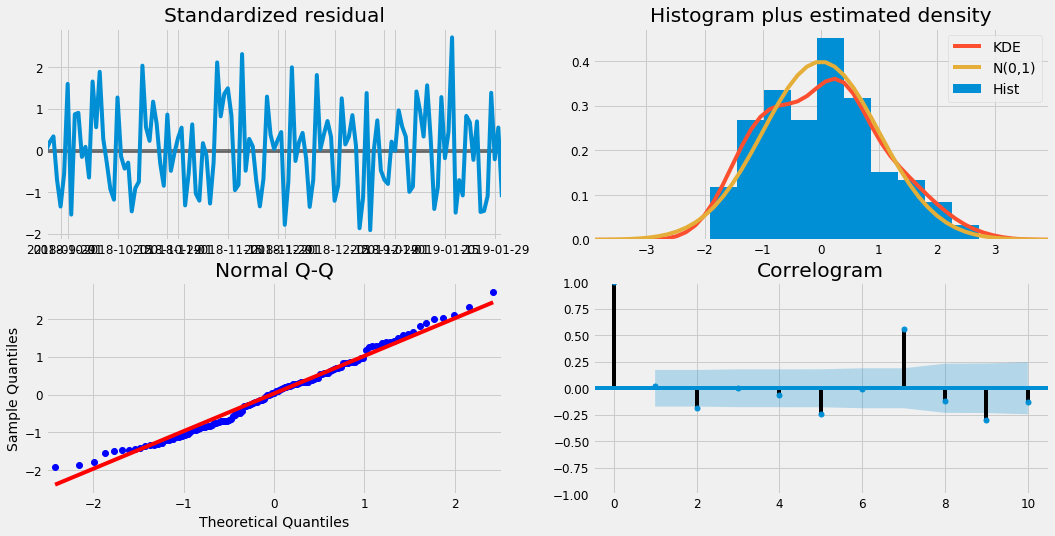

In [323]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

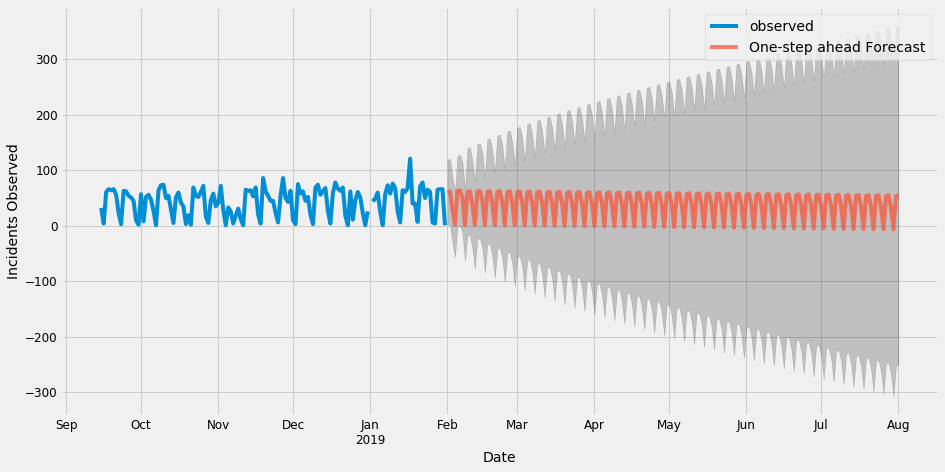

In [324]:
pred = results.get_prediction(start=pd.to_datetime('2019-02-01'),end = pd.to_datetime('2019-08-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Incidents Observed')
plt.legend()
plt.show()